In [107]:
import pandas as pd
from kneed import KneeLocator
import ast
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [114]:
df = pd.read_csv("/Users/leo/M2TALS1/project/movies_metadata.csv")
df.shape

/var/folders/qw/ppnlkp3d64s3j26nm8dvxq800000gn/T/ipykernel_39526/138597897.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/leo/M2TALS1/project/movies_metadata.csv")


(45466, 24)

In [115]:
df["genres"] = df["genres"].apply(ast.literal_eval)
exploded = df.explode("genres")
romance_df = exploded.loc[exploded["genres"].apply(lambda x: isinstance(x, dict) and x["name"] == "Romance")]
romance_df.shape

(6735, 24)

In [116]:
romance_df["vote_count"] = romance_df["vote_count"].fillna(0)
romance_df = romance_df.sort_values("vote_count")
print(romance_df.iloc[-1]["vote_count"])


8147.0


/var/folders/qw/ppnlkp3d64s3j26nm8dvxq800000gn/T/ipykernel_39526/2182324621.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  romance_df["vote_count"] = romance_df["vote_count"].fillna(0)


In [119]:
romance_df["vote_count"]

34325       0.0
17231       0.0
28757       0.0
17287       0.0
41832       0.0
          ...  
40882    4745.0
19731    4840.0
42222    5530.0
1639     7770.0
351      8147.0
Name: vote_count, Length: 6735, dtype: float64

/Users/leo/M2TALS1/project/.venv/lib/python3.13/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


<Axes: xlabel='vote_count', ylabel='Count'>

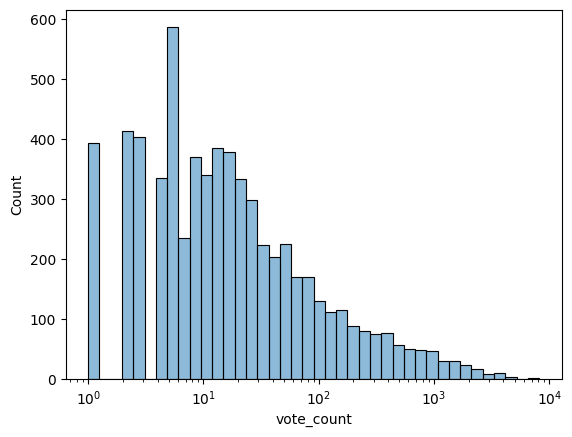

In [131]:
sns.histplot(romance_df["vote_count"], kde=True, log_scale=(True, False))

In [122]:
counts = romance_df["vote_count"].value_counts().sort_index()
x = counts.index.values
y = counts.values

Text(0, 0.5, 'count (log scale)')

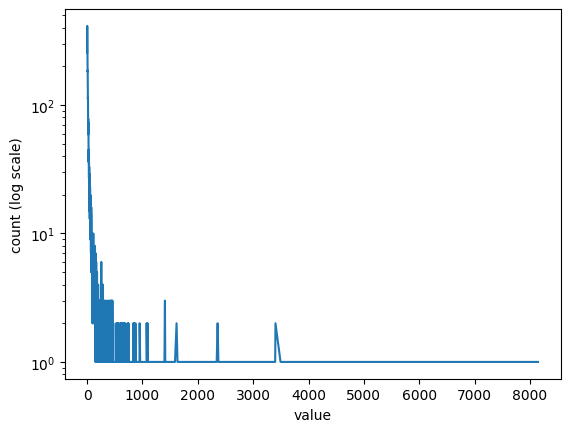

In [127]:
plt.plot(x, y)
plt.yscale('log')
plt.xlabel('value')
plt.ylabel('count (log scale)')

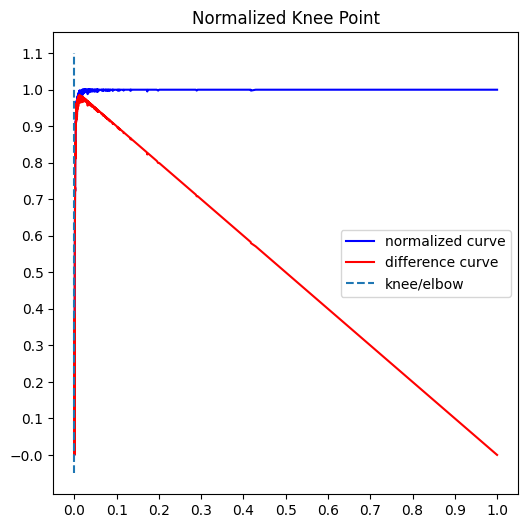

In [125]:
# find the knee of the curve
kneedle = KneeLocator(x, y, curve="convex", direction="decreasing")
kneedle.plot_knee_normalized()

In [126]:
kneedle.knee

np.float64(0.0)

In [36]:
df = df[df["vote_count"] <= 25]

In [37]:
df.size

767232